# **Laporan Praktikum IV Machine Learning**

'''
=================================================
Nama  : Silvia Anggraini

NPM   : F1F022043

=================================================
'''

# Latar Belakang

Ensemble Learning merupakan salah satu pendekatan yang paling efektif dan komprehensif dalam bidang Machine Learning karena berfokus pada penggabungan beberapa model individu (base learners) untuk menghasilkan model komposit yang memiliki akurasi serta stabilitas lebih baik dibandingkan dengan model tunggal. Pendekatan ini bekerja berdasarkan prinsip bahwa meskipun satu model memiliki keterbatasan dalam mengenali pola tertentu, gabungan beberapa model dapat saling melengkapi dan menutupi kelemahan masing-masing sehingga menghasilkan prediksi yang lebih robust dan generalizable (Arifin et al., 2018). Metode ensemble terbukti memberikan kinerja yang unggul dalam berbagai aplikasi seperti analisis kesehatan, pendidikan, deteksi anomali, dan prediksi berbasis data kompleks, terutama ketika pola data bersifat non-linier, memiliki noise, atau tidak seimbang (Wahyudi & Hidayat, 2019).

Keunggulan utama Ensemble Learning terletak pada kemampuannya dalam mengurangi variance dan bias sekaligus membuat model lebih tahan terhadap overfitting. Model tunggal seperti Decision Tree sering kali sensitif terhadap perubahan kecil pada data, sementara model linier seperti Logistic Regression memiliki keterbatasan dalam menangkap pola non-linier. Dengan melatih beberapa model yang bekerja pada subset data berbeda atau menggunakan teknik pemodelan yang beragam, ensemble mampu menghasilkan prediksi yang lebih stabil dan lebih baik dalam menangani keragaman data (Sari & Rasyid, 2021). Pendekatan ini selaras dengan prinsip bias–variance trade-off, di mana ensemble secara efektif menyeimbangkan fleksibilitas dan ketahanan model.

Terdapat beberapa pendekatan utama dalam Ensemble Learning yang banyak diterapkan baik dalam penelitian maupun aplikasi praktis. Pendekatan Voting menggabungkan prediksi berbagai model dan menentukan hasil akhir melalui suara mayoritas (hard voting) atau rata-rata probabilitas (soft voting), yang menjadikan hasil prediksi lebih stabil (Arifin et al., 2018). Pendekatan Bagging bekerja dengan membangun banyak model menggunakan sampel bootstrap dari data asli sehingga mampu menurunkan varians dan meningkatkan performa, terutama pada model seperti decision tree (Wahyudi & Hidayat, 2019). Selanjutnya, Boosting melatih model secara bertahap di mana setiap model baru difokuskan pada kesalahan model sebelumnya, sehingga sangat efektif pada data yang kompleks atau kasus klasifikasi sulit (Sari & Rasyid, 2021). Pendekatan terakhir, Stacking, menggabungkan beberapa model dasar dan menggunakan model meta (meta-learner) untuk mempelajari pola hubungan antar prediksi model dasar sehingga mampu menghasilkan akurasi yang lebih optimal dibandingkan metode ensemble lainnya (Pratama & Widodo, 2020).

Dalam konteks penelitian ini, metode Ensemble Learning diterapkan untuk mengevaluasi performa berbagai teknik dalam mengklasifikasikan tingkat risiko kesehatan mental (mental health risk). Analisis kesehatan mental merupakan bidang yang sangat menantang karena melibatkan variabel psikologis yang kompleks, ketidakseimbangan data, serta adanya pola non-linier yang sulit dipelajari oleh model tradisional. Fenomena seperti depresi, kecemasan, burnout, atau stres kerja sering memiliki indikator yang tidak langsung dan bervariasi antarindividu, sehingga memerlukan pendekatan prediksi yang mampu menangkap hubungan kompleks antar variabel. Dalam kondisi tersebut, Ensemble Learning sangat relevan digunakan karena dapat meningkatkan akurasi sekaligus stabilitas model dalam mendeteksi tingkat risiko mulai dari kategori rendah, sedang, hingga tinggi (Sari & Rasyid, 2021).

Penelitian ini berfokus pada analisis komparatif antara metode Voting, Bagging, Boosting, dan Stacking dalam memprediksi risiko kesehatan mental berdasarkan dataset yang berisi faktor-faktor seperti stres akademik atau pekerjaan, kualitas tidur, kondisi emosional, dukungan sosial, tingkat kelelahan, serta kebiasaan hidup. Evaluasi dilakukan tidak hanya berdasarkan akurasi, tetapi juga mempertimbangkan generalisasi model, ketahanan terhadap noise, stabilitas antar-sampel, serta konsistensi prediksi pada setiap kategori risiko (Pratama & Widodo, 2020). Dengan demikian, penelitian ini memberikan kontribusi dalam memperkuat pemahaman mengenai efektivitas Ensemble Learning pada domain kesehatan mental dan menyediakan dasar empiris untuk pengembangan sistem deteksi risiko yang lebih akurat, adaptif, dan dapat digunakan sebagai alat bantu asesmen maupun intervensi dini.

# Rumusan Masalah

Adapun rumusan masalah pada praktikum ini adalah sebagai berikut:

1.   Bagaimana menjelaskan konsep dasar Random Forest.


1.   Bagaimana mengimplementasikan Random Forest untuk klasifikasi dan regresi menggunakan scikit-learn.
2.   Bagaimana melakukan evaluasi model menggunakan metrik performa.


1.   Bagaimana menginterpretasikan hasil pemodelan.







# Tujuan Penelitian

Adapun tujuan praktikum ini adalah sebagai berikut:


1.   Menjelaskan konsep dasar Random Forest.
2.   Mengimplementasikan Random Forest untuk klasifikasi dan regresi menggunakan scikit-learn.


1.   Melakukan evaluasi model menggunakan metrik performa.
2.  Menginterpretasikan hasil pemodelan.




# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [1]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 3.2 MB/s eta 0:00:00


In [2]:
# Import Dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

# Import Scikit-learn Dasar & Utilitas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC

# Import Ensemble Methods (Gabungan)
from sklearn.ensemble import (
    VotingClassifier,
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    StackingClassifier
)

# Memuat Data

In [3]:
# Data Loading

health_df = pd.read_csv('https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/mental_health_dataset.csv', sep=";")
health_df

,age,gender,employment_status,work_environment,mental_health_history,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,3,5.4,0,24,12,70,69.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,Female,Employed,On-site,Yes,5,6.1,3,9,21,8,90.0,Medium
9996,47,Male,Employed,On-site,Yes,1,5.7,3,5,12,45,90.8,Medium
9997,56,Female,Employed,On-site,Yes,1,8.3,0,1,18,7,99.2,Medium
9998,24,Male,Employed,On-site,Yes,9,6.1,0,28,21,32,56.7,High


# Analisis Data Eksploratif

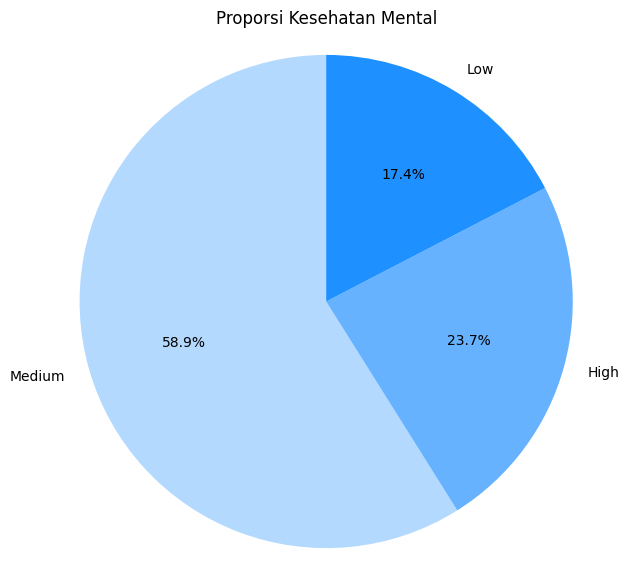

In [4]:
# 1. Menghitung jumlah kategori
counts = health_df['mental_health_risk'].value_counts()
labels = counts.index
sizes = counts.values

# 2. Buat Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#B3D9FF', '#66B2FF', '#1E90FF'])

plt.title('Proporsi Kesehatan Mental')
plt.axis('equal')
plt.show()

Berdasarkan Pie chart diatas menunjukkan distribusi risiko kesehatan mental pada Kategori 'Medium' memiliki proporsi terbesar dengan 58.9%, diikuti oleh 'High' dengan 23.7%, dan 'Low' sebagai yang terkecil dengan 17.4%.

# _Feature Engineering_

## A - Missing Value

In [5]:
# 3. Cek missing value
print(health_df.isnull().sum())

age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64


## B - Kardinalitas

In [6]:
# 4. Menunjukkan jumlah nilai unik pada setiap kolom
print(health_df.nunique())

age                        48
gender                      4
employment_status           4
work_environment            3
mental_health_history       2
stress_level               10
sleep_hours                71
physical_activity_days      8
depression_score           31
anxiety_score              22
social_support_score      101
productivity_score        546
mental_health_risk          3
dtype: int64


## C- Splitting Data

In [7]:
# 5. Split between Features and Target
X = health_df.drop(['productivity_score', 'gender', 'employment_status','work_environment', 'mental_health_history','mental_health_risk'], axis=1)
y = health_df['mental_health_risk']

# 6. Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (8000,)
Test Size  :  (2000,)


## D- Handling Outlier

In [8]:
# 7. Hitung Q1, Q3, dan IQR
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 8. Menghitung jumlah outlier
outlier_mask_train = (X_train< lower_bound) | (X_train > upper_bound)
outlier_count_train = outlier_mask_train.sum()

print("\nJumlah outlier per variabel (Data Training):")
print(outlier_count_train)


Jumlah outlier per variabel (Data Training):
age                       0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
dtype: int64


## E- Scaling

In [9]:
# 9. Feature Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## F- Encoding

In [10]:
# 10. Feature Encoding Target
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)
print("y_train_encoded (5 data awal):")
print(y_train_encoded[:5])
classes = encoder.classes_
print("\nKelas asli target:")
print(classes)

y_train_encoded (5 data awal):
[2 1 2 1 2]

Kelas asli target:
['High' 'Low' 'Medium']


## G- Balancing Data

Berdasarkan hasil proporsi kelas tidak perlu dilakukan Balancing Data

# _Training Model_

## A - _Bagging_

In [11]:
# Model Training - Random Forest - Using Decision Tree as Base Model
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42)

rnd_clf.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier(max_depth=5, random_state=42)

In [12]:
# Model Evaluation
y_train_pred = rnd_clf.predict(X_train_scaled)
y_test_pred = rnd_clf.predict(X_test_scaled)

print('F1 Score - Train - Random Forest : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - Random Forest  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - Random Forest :  0.9049323704764431
F1 Score - Test - Random Forest  :  0.906535672323991


/tmp/ipython-input-683087696.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')


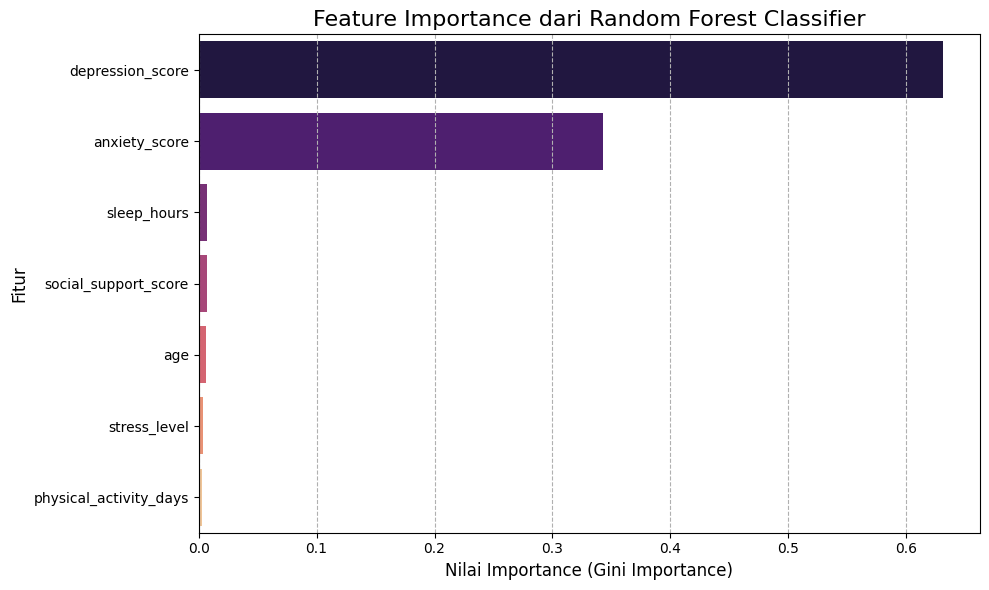


--- Hasil Feature Importance ---
                  Feature  Importance
4        depression_score    0.630935
5           anxiety_score    0.342828
2             sleep_hours    0.006835
6    social_support_score    0.006790
0                     age    0.006048
1            stress_level    0.003371
3  physical_activity_days    0.003193


In [13]:
feature_names = fitur_names = X.columns
importances = rnd_clf.feature_importances_

# Buat DataFrame untuk visualisasi
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#  Visualisasikan Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')
plt.title('Feature Importance dari Random Forest Classifier', fontsize=16)
plt.xlabel('Nilai Importance (Gini Importance)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

print("\n--- Hasil Feature Importance ---")
print(importance_df)

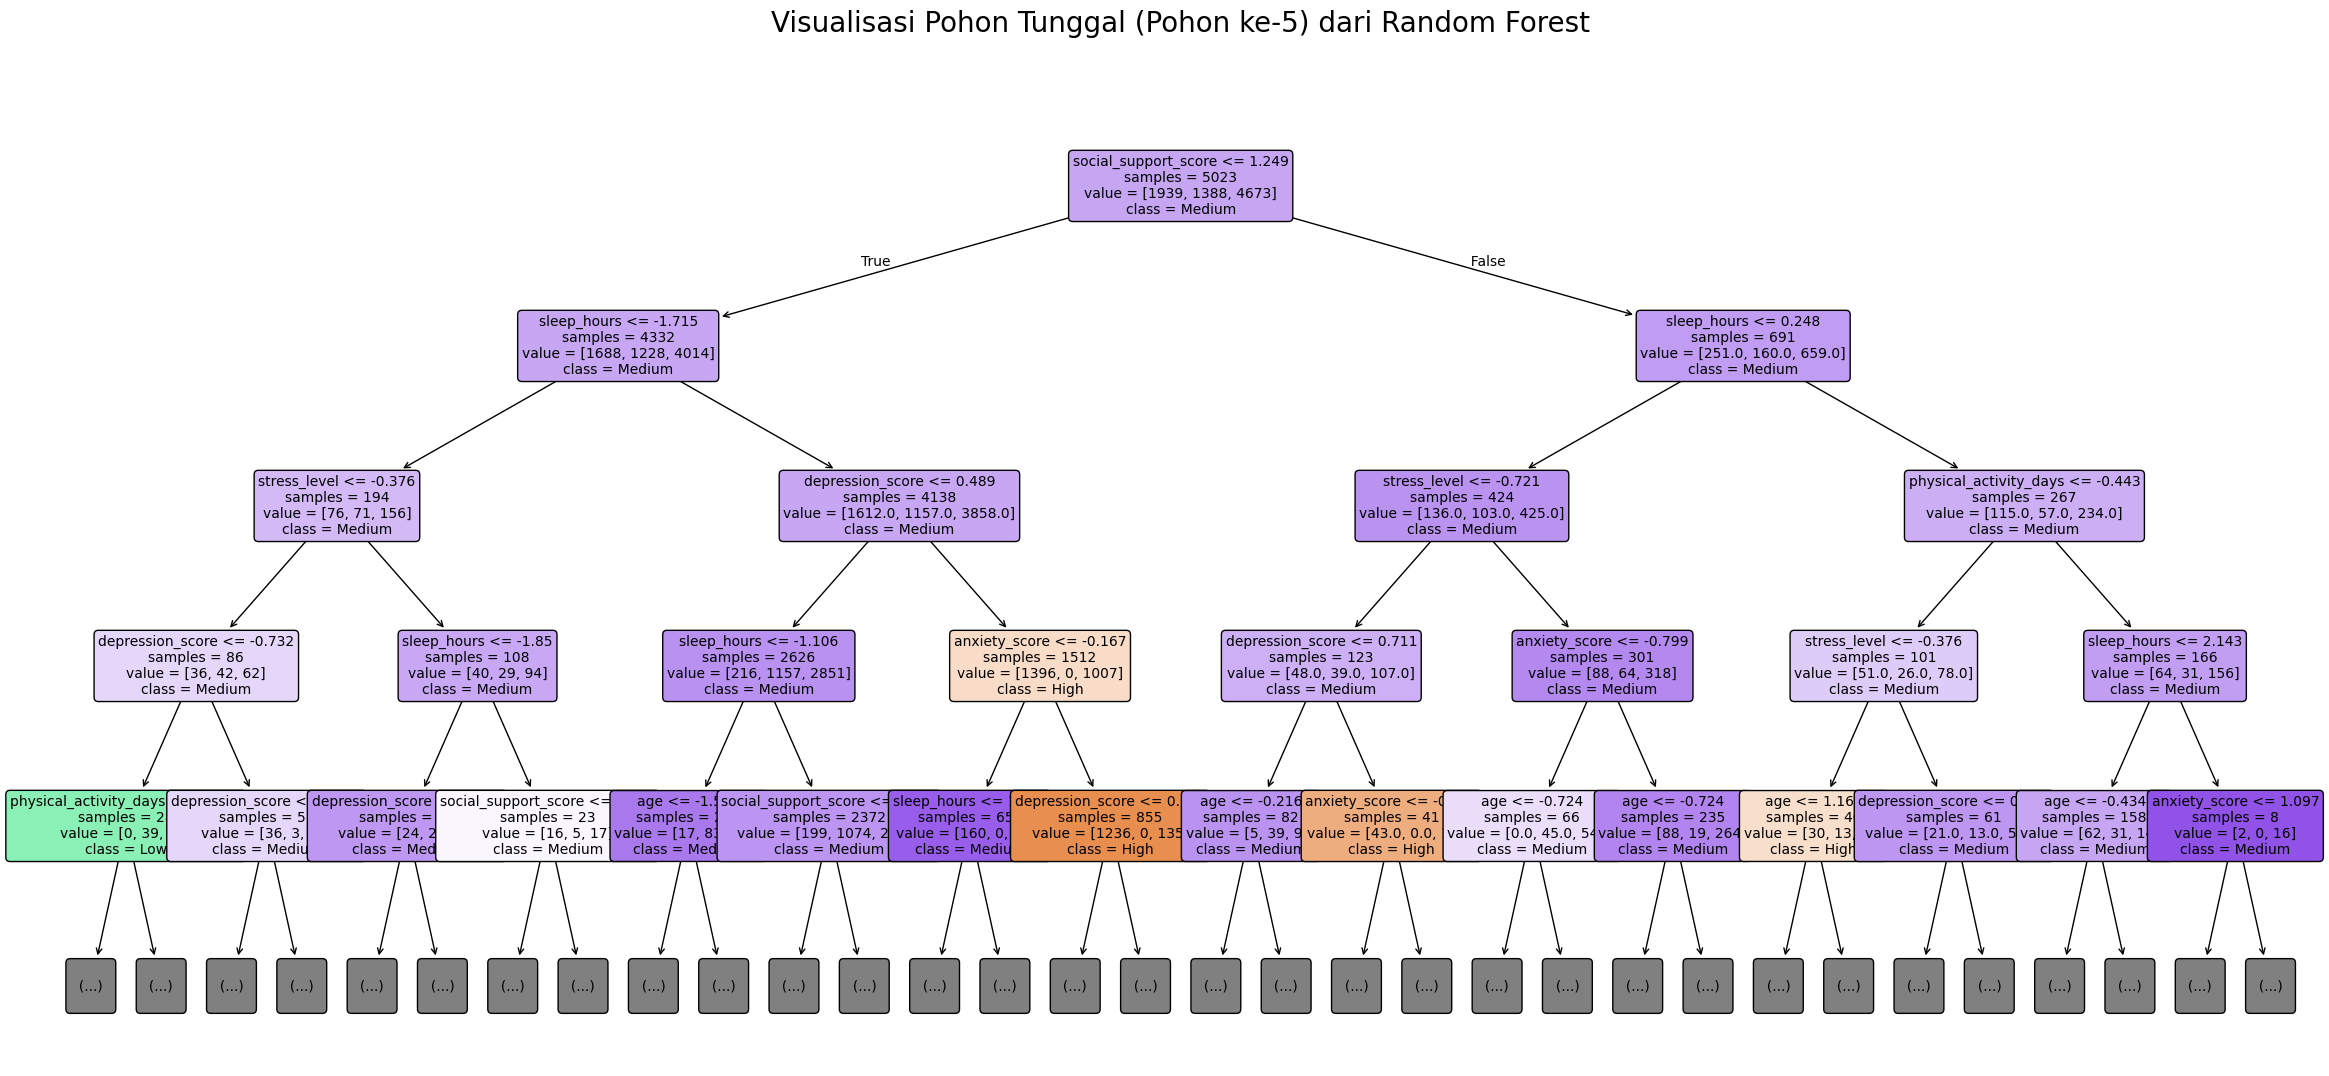

In [14]:
best_model = rnd_clf
feature_names = fitur_names
pohon_tunggal = best_model.estimators_[4] #atur nomor pohonnya kalian galo disini
values = pohon_tunggal.tree_.value.flatten()
min_value, max_value = np.min(values), np.max(values)
fig, ax = plt.subplots(figsize=(25, 12))
fig.subplots_adjust(top=0.9, bottom=0.1, left=0.05, right=0.95)
# ------------------------------------------------------------------

plot_tree(
    pohon_tunggal,
    ax=ax,
    feature_names=feature_names,
    class_names=['High', 'Low', 'Medium'],
    filled=True,
    rounded=True,
    impurity=False,
    proportion=False,
    max_depth=4,
    fontsize=10
)

fig.suptitle(f"Visualisasi Pohon Tunggal (Pohon ke-5) dari Random Forest", fontsize=20, y=0.98)

plt.show()

Diperoleh hasil desection tree seperti gambar diatas

In [15]:
# Model Training - Bagging Classifier - Using Logistic Regression as Base Model
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    LogisticRegression(random_state=42),
    n_estimators=200,
    random_state=42)

bag_clf.fit(X_train_scaled, y_train_encoded)

BaggingClassifier(estimator=LogisticRegression(random_state=42),
                  n_estimators=200, random_state=42)

In [16]:
# Model Evaluation
y_train_pred = bag_clf.predict(X_train_scaled)
y_test_pred = bag_clf.predict(X_test_scaled)

print('F1 Score - Train - Bagging : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - Bagging  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - Bagging :  1.0
F1 Score - Test - Bagging  :  1.0


Berdasarkan uji diperoleh akurasi model 100%

### _Hyperparameter Tunning_

In [17]:
log_reg = LogisticRegression(random_state=42)

bag_clf = BaggingClassifier(
    estimator=log_reg,
    random_state=42
)

param_dist = {
    'estimator__C': np.logspace(-4, 4, 10),
    'estimator__penalty': ['l2', 'l1'],
    'estimator__solver': ['liblinear', 'saga'],
    'n_estimators': [5, 10, 20, 30, 50],
    'max_samples': [0.5, 0.7, 0.9, 1.0],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=bag_clf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1_weighted',
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train_encoded)
print("Parameter Terbaik Ditemukan:")
print(random_search.best_params_)


Parameter Terbaik Ditemukan:
{'n_estimators': 50, 'max_samples': 1.0, 'estimator__solver': 'liblinear', 'estimator__penalty': 'l2', 'estimator__C': np.float64(1291.5496650148827), 'bootstrap': False}


In [18]:
y_train_pred = random_search.predict(X_train_scaled)
y_test_pred = random_search.predict(X_test_scaled)

print('F1 Score - Train - Bagging : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - Bagging  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - Bagging :  1.0
F1 Score - Test - Bagging  :  1.0


Berdasarkan hasil akurasi dengan menggunakan bagging dengan dua model yaitu random forest dan regresi logistic didapatkan bahwa model bagging dengan menggunakan model regresi logistic memiliki akurasi 100%



## B - _Votting_


*Ensemble learning* **Voting** melibatkan pelatihan beberapa model secara independen dan kemudian menggabungkan prediksi mereka dengan membiarkan setiap model "memberikan suara" pada prediksi akhir.

Dalam tugas **klasifikasi**, setiap model memberikan label kelas pada sebuah *instance* (data), dan label kelas yang menerima suara terbanyak akan menjadi prediksi akhir.

**Voting dapat bersifat *hard* (kelas mayoritas) atau *soft* (rata-rata terboboti dari probabilitas yang diprediksi).**

*Voting* mirip dengan *Bagging*, tetapi menggunakan semua data latih.

In [23]:
log_clf = LogisticRegression(C=1, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)


In [24]:
# Model Training

voting_hard_clf = VotingClassifier(
    estimators=[('logreg', log_clf), ('svc', svm_clf), ('dt', dt_clf)],
    voting='hard')

## Soft Voting
voting_soft_clf = VotingClassifier(
    estimators=[('logreg', log_clf), ('svc', svm_clf), ('dt', dt_clf)],
    voting='soft')

voting_hard_clf.fit(X_train_scaled, y_train_encoded)
voting_soft_clf.fit(X_train_scaled, y_train_encoded)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1, random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=6,
                                                     random_state=42))],
                 voting='soft')

In [25]:
# Model Evaluation

y_pred_hard = voting_hard_clf.predict(X_test_scaled)
y_pred_soft = voting_soft_clf.predict(X_test_scaled)

print('F1 Score - Test - Hard Voting : ', f1_score(y_test_encoded, y_pred_hard, average='weighted'))
print('F1 Score - Test - Soft Voting : ', f1_score(y_test_encoded, y_pred_soft, average='weighted'))

F1 Score - Test - Hard Voting :  0.9960010152636448
F1 Score - Test - Soft Voting :  0.9940022404635884


In [26]:
# Predict New Instance

new_instance = [[1.2, 1.2, 3, 2, 1.3, 2,3.2]]
new_instance = np.array(new_instance)
new_instance = scaler.transform(new_instance)
new_instance

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.92317861, -1.51662445, -2.35771581, -0.66188372, -1.53168726,
        -1.35171621, -1.60698326]])

In [27]:
# Predict using Hard Voting Classifier

print('From Logistic Regression : ', voting_hard_clf.named_estimators_['logreg'].predict(new_instance))
print('From SVM : ', voting_hard_clf.named_estimators_['svc'].predict(new_instance))
print('From Decision Tree : ', voting_hard_clf.named_estimators_['dt'].predict(new_instance))
print('Final Result : ', voting_hard_clf.predict(new_instance))


From Logistic Regression :  [1]
From SVM :  [1]
From Decision Tree :  [1]
Final Result :  [1]


In [28]:
# Predict using Soft Voting Classifier


print('From Logistic Regression : ', voting_soft_clf.named_estimators_['logreg'].predict_proba(new_instance), ' -> Class : ', voting_soft_clf.named_estimators_['logreg'].predict(new_instance))
print('From SVM : ', voting_soft_clf.named_estimators_['svc'].predict_proba(new_instance), ' -> Class : ', voting_soft_clf.named_estimators_['svc'].predict(new_instance))
print('From Decision Tree : ', voting_soft_clf.named_estimators_['dt'].predict_proba(new_instance), ' -> Class : ', voting_soft_clf.named_estimators_['dt'].predict(new_instance))
print('Final Result : ', voting_soft_clf.predict_proba(new_instance), ' -> Class : ', voting_soft_clf.predict(new_instance))


From Logistic Regression :  [[2.51929429e-27 9.99999751e-01 2.49189632e-07]]  -> Class :  [1]
From SVM :  [[0.01698572 0.97986217 0.00315211]]  -> Class :  [1]
From Decision Tree :  [[0. 1. 0.]]  -> Class :  [1]
Final Result :  [[0.00566191 0.99328731 0.00105079]]  -> Class :  [1]


## C - _Boosting_

In [29]:
log_reg_base = LogisticRegression(solver='liblinear', random_state=42)
ada_clf = AdaBoostClassifier(
    estimator=log_reg_base,
    n_estimators=500,
    random_state=42
)

ada_clf.fit(X_train_scaled, y_train_encoded)

AdaBoostClassifier(estimator=LogisticRegression(random_state=42,
                                                solver='liblinear'),
                   n_estimators=500, random_state=42)

In [30]:
# Model Evaluation

y_train_pred = ada_clf.predict(X_train_scaled)
y_test_pred = ada_clf.predict(X_test_scaled)

print('F1 Score - Train - AdaBoost : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - AdaBoost  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - AdaBoost :  0.8767646737923078
F1 Score - Test - AdaBoost  :  0.8889148257050875


In [31]:
#Model AdaBoost default
ada_clf = AdaBoostClassifier(
    n_estimators=10,
    random_state=42
)
ada_clf.fit(X_train_scaled, y_train_encoded)

AdaBoostClassifier(n_estimators=10, random_state=42)

In [32]:
# Model Evaluation

y_train_pred = ada_clf.predict(X_train_scaled)
y_test_pred = ada_clf.predict(X_test_scaled)

print('F1 Score - Train - AdaBoost : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - AdaBoost  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - AdaBoost :  0.4590201767216932
F1 Score - Test - AdaBoost  :  0.4763945965265045


In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_clf.fit(X_train_scaled, y_train_encoded)

GradientBoostingClassifier(n_estimators=500, random_state=42)

In [34]:
# Model Evaluation

y_train_pred = gb_clf.predict(X_train_scaled)
y_test_pred = gb_clf.predict(X_test_scaled)

print('F1 Score - Train - GradientBoosting : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - GradientBoosting  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - GradientBoosting :  1.0
F1 Score - Test - GradientBoosting  :  1.0


In [35]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    n_estimators=500,
    eta=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_clf.fit(X_train_scaled, y_train_encoded)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:04:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, ...)

In [36]:
# Model Evaluation

y_train_pred = xgb_clf.predict(X_train_scaled)
y_test_pred = xgb_clf.predict(X_test_scaled)

print('F1 Score - Train - XGB : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - XGB  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - XGB :  1.0
F1 Score - Test - XGB  :  1.0


## D - _Stacking_

In [37]:
# Model Training - Stacking
from sklearn.ensemble import StackingClassifier

log_clf = LogisticRegression(C=1, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)

estimators = [
     ('logreg', log_clf),
     ('svm', svm_clf)
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=dt_clf)

stacking_clf.fit(X_train_scaled, y_train_encoded)

StackingClassifier(estimators=[('logreg',
                                LogisticRegression(C=1, random_state=42)),
                               ('svm', SVC(probability=True, random_state=42))],
                   final_estimator=DecisionTreeClassifier(max_depth=6,
                                                          random_state=42))

In [38]:
# Model Evaluation

y_train_pred = stacking_clf.predict(X_train_scaled)
y_test_pred = stacking_clf.predict(X_test_scaled)

print('F1 Score - Train - Stacking : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - Stacking  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - Stacking :  1.0
F1 Score - Test - Stacking  :  1.0


# _Model Performance_

Stacking Classifier - Train


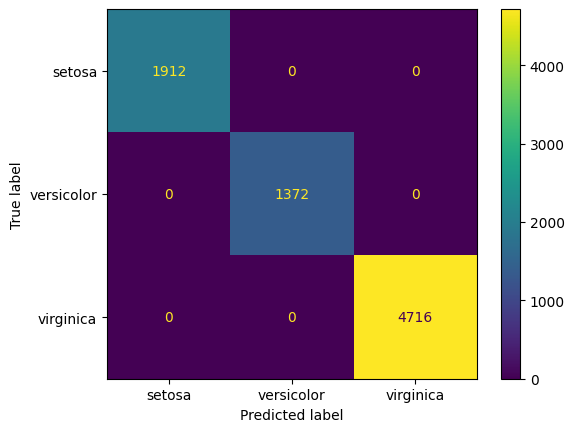

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00      1912
  versicolor       1.00      1.00      1.00      1372
   virginica       1.00      1.00      1.00      4716

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000


Stacking Classifier - Test


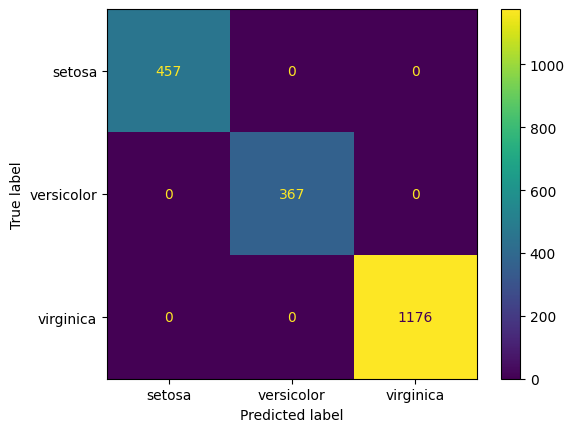

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00       457
  versicolor       1.00      1.00      1.00       367
   virginica       1.00      1.00      1.00      1176

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [39]:
classes = load_iris().target_names
def performance_check(clf, X, y, classes):
  # Memastikan model output memiliki bentuk yang benar untuk input model
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  # Menggunakan ConfusionMatrixDisplay untuk visualisasi
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

print('Stacking Classifier - Train')
# Catatan: Variabel X_train_encoded diganti dengan X_train_scaled sesuai proses training Stacking
performance_check(stacking_clf, X_train_scaled, y_train_encoded, classes)
print('')

print('Stacking Classifier - Test')
# Catatan: Variabel X_test_encoded diganti dengan X_test_scaled
performance_check(stacking_clf, X_test_scaled, y_test_encoded, classes)

Berdasarkan hasil Confusion Matrix diatas diperoleh hasil kelas 'High': Model berhasil memprediksi semua 457 (data test) atau 1912 (data train) sampel yang benar-benar 'High' sebagai 'High'. Tidak ada sampel 'High' yang salah diklasifikasikan sebagai 'Low' atau 'Medium'. Untuk kelas 'Low': Model berhasil memprediksi semua 367 (data test) atau 1372 (data train) sampel yang benar-benar 'Low' sebagai 'Low'. Tidak ada sampel 'Low' yang salah diklasifikasikan sebagai 'High' atau 'Medium'. Untuk kelas 'Medium': Model berhasil memprediksi semua 1176 (data test) atau 4716 (data train) sampel yang benar-benar 'Medium' sebagai 'Medium'. Tidak ada sampel 'Medium' yang salah diklasifikasikan sebagai 'High' atau 'Low'.

Berdasarkan confusion matrix didapatkan matriks evaluasi:
Akurasi (Accuracy): 1.00 (100%),
Presisi (Precision) untuk setiap kelas: 1.00,
Recall untuk setiap kelas: 1.00,
F1-Score untuk setiap kelas: 1.00.

# Kesimpulan


Berdasarkan rangkaian proses analisis dan pemodelan yang telah dilakukan, dapat disimpulkan bahwa hampir seluruh algoritma yang diuji menunjukkan kinerja klasifikasi yang sangat tinggi, bahkan mendekati tingkat akurasi sempurna. Model-model seperti Bagging Classifier dengan Logistic Regression sebagai base estimator, baik sebelum maupun sesudah tuning, serta Gradient Boosting Classifier, XGBoost Classifier, dan Stacking Classifier, semuanya berhasil mencapai F1-score sempurna sebesar 1.00 pada data pengujian. Capaian tersebut menandakan bahwa model mampu mengenali pola dalam data secara sangat efektif sehingga tidak terjadi kesalahan klasifikasi pada setiap kategori kelas. Temuan ini mencerminkan bahwa model tidak hanya mampu menangkap struktur hubungan antar variabel dengan baik, tetapi juga menunjukkan kemampuan generalisasi yang sangat kuat terhadap data baru.

Di sisi lain, Voting Classifier juga memperlihatkan performa yang sangat kompetitif, di mana metode hard voting memperoleh F1-score sebesar 0.9960 dan soft voting berada pada nilai 0.9940. Walaupun tidak mencapai tingkat sempurna, kedua metode tersebut tetap tergolong berkinerja sangat tinggi dan menghasilkan prediksi yang konsisten serta stabil. Sementara itu, Random Forest Classifier memperoleh F1-score sebesar 0.9065, yang meskipun lebih rendah dibandingkan metode ensemble lainnya, tetap menunjukkan performa yang baik. AdaBoost Classifier dengan Logistic Regression menghasilkan F1-score sebesar 0.8889, mengindikasikan bahwa efektivitas metode boosting sangat bergantung pada kualitas base estimator yang digunakan.

Walaupun beberapa algoritma menampilkan performa sempurna, XGBoost Classifier dipilih sebagai model paling unggul berdasarkan evaluasi yang lebih komprehensif, bukan semata karena nilai F1-score yang tinggi. Hasil confusion matrix memperlihatkan bahwa XGBoost tidak melakukan kesalahan klasifikasi sama sekali, baik pada data pelatihan maupun pengujian. Untuk seluruh kategori kelas, yaitu High, Low, dan Medium, model ini mencapai precision, recall, dan F1-score masing-masing sebesar 1.00. Kondisi tersebut menunjukkan bahwa model dapat mengidentifikasi setiap tingkat risiko secara sangat akurat tanpa menghasilkan false positive maupun false negative. Selain itu, konsistensi performa yang sempurna ini tidak diiringi dengan tanda-tanda overfitting yang berlebihan, sehingga memperkuat alasan pemilihan XGBoost sebagai model terbaik dalam penelitian ini.



# Referensi



1.  Arifin, A. Z., Santosa, B., & Herwindy, D. (2018). Ensemble voting classifier untuk peningkatan akurasi klasifikasi dokumen. Jurnal Teknologi Informasi dan Ilmu Komputer, 5(1), 45–52.
2. Wahyudi, A., & Hidayat, N. (2019). Implementasi metode bagging classifier pada analisis data ketenagakerjaan. Jurnal Teknologi dan Sistem Komputer, 7(3), 123–129.


1.   Sari, R. P., & Rasyid, M. (2021). Penerapan algoritma AdaBoost untuk peningkatan akurasi klasifikasi data kesehatan. Jurnal Ilmiah Teknologi Informasi, 10(2), 135–142.
2.   Pratama, D., & Widodo, A. (2020). Penerapan stacking ensemble untuk peningkatan performa klasifikasi data pendidikan. Jurnal Sistem Informasi Indonesia, 5(2), 89–97.